In [39]:
# If wordcloud is not installed uncomment the below line by removing # and run it first.
# NOTE: WordCloud is not installed in Jupyter Notebook, so you have to install by pip.

#!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [44]:
## Importing Libraries from Python ##  -  Import all librarie to be used here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib style
plt.style.use('ggplot')

# Add libraries for data transformation
import datetime
from string import punctuation

# Libraries for wordcloud making and image importing
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
## Read the dataset using delimitter '\t' ##
## Also print the dataset ##
DataSet = pd.read_csv('amazon_alexa.tsv',sep = '\t')
print(DataSet)
DataSet.shape

      rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                

(3150, 5)

In [3]:
## Describing the dataset using describe() ##
## This provides us information about the dataset ##
DataSet.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [4]:
## Print the first 5 rows of the dataset for viewing the details of each row and column ##
DataSet.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [10]:
# Transform string data and remove punctuation
###################################################
#               Convert to Lower Case             #
###################################################
DataSet['verified_reviews'] = DataSet.verified_reviews.apply(lambda x : x.lower())     
###################################################
#                Apply Punctuation                #
###################################################
DataSet['verified_reviews'] = DataSet.verified_reviews.apply(lambda x : ''.join([c for c in x if c not in punctuation]))
DataSet.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,love my echo,1
1,5,31-Jul-18,Charcoal Fabric,loved it,1
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1
4,5,31-Jul-18,Charcoal Fabric,music,1


In [12]:
# Get length of review for EDA
DataSet['review_length'] = DataSet.verified_reviews.apply(lambda x : len(x))
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,31-Jul-18,Charcoal Fabric,love my echo,1,12
1,5,31-Jul-18,Charcoal Fabric,loved it,1,8
2,4,31-Jul-18,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,31-Jul-18,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,31-Jul-18,Charcoal Fabric,music,1,5


In [13]:
# Find mean, standard deviation and maximum for the dataset
print('The mean for the length of review:', DataSet['review_length'].mean())
print('The standard deviation for the length of reviews:', DataSet['review_length'].std())
print('The maximum for the length of reviews:', DataSet['review_length'].max())

The mean for the length of review: 128.1615873015873
The standard deviation for the length of reviews: 177.17558499255605
The maximum for the length of reviews: 2730


Text(0.5, 1.0, 'Distribution of Review Length')

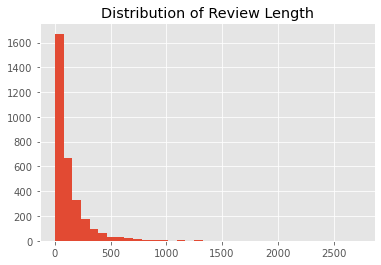

In [41]:
# Let's take a look at the distribution of the length
DataSet['review_length'].hist(bins=35)
plt.title('Distribution of Review Length')

In [32]:
# Tranform date to datetime data-type
DataSet['date'] = DataSet.date.apply(lambda x : datetime.datetime.strptime(x, '%d-%b-%y'))
DataSet.head()

,rating,date,variation,verified_reviews,feedback,review_length
0,5,2018-07-31,Charcoal Fabric,love my echo,1,12
1,5,2018-07-31,Charcoal Fabric,loved it,1,8
2,4,2018-07-31,Walnut Finish,sometimes while playing a game you can answer ...,1,192
3,5,2018-07-31,Charcoal Fabric,i have had a lot of fun with this thing my 4 y...,1,168
4,5,2018-07-31,Charcoal Fabric,music,1,5


In [33]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rating            3150 non-null   int64         
 1   date              3150 non-null   datetime64[ns]
 2   variation         3150 non-null   object        
 3   verified_reviews  3150 non-null   object        
 4   feedback          3150 non-null   int64         
 5   review_length     3150 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 147.8+ KB


In [42]:
A = np.array(Image.open('amazon-logo-white.png'))

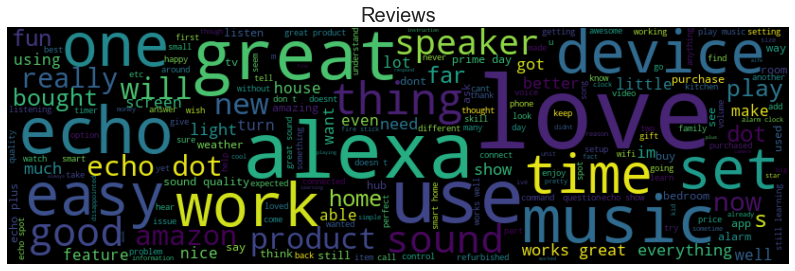

In [53]:
np.random.seed(321)
sns.set(rc={'figure.figsize':(14,8)})
reviews  = ' '.join(DataSet['verified_reviews'].tolist())

wordcloud = WordCloud(mask=A , background_color="black").generate(reviews)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Reviews', size=20)
plt.show()

C:\Program Files\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Counts of each variation')

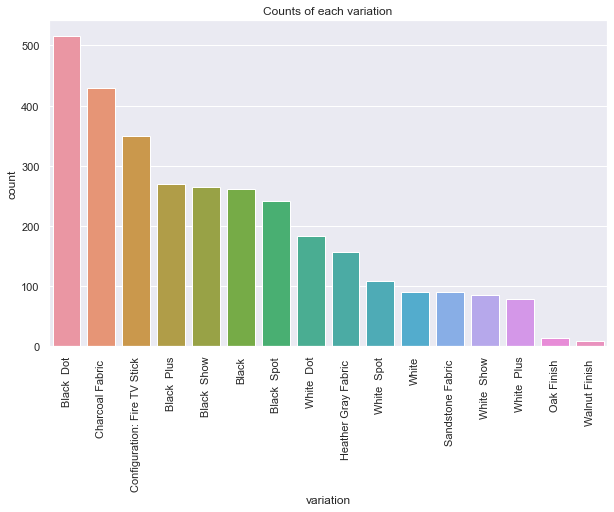

In [55]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(DataSet.variation,
             order = DataSet['variation'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Counts of each variation')